In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

print(torch.__version__)
torch.cuda.is_available()

2.8.0+cu126


True

In [2]:
trans = transforms.Compose([
    transforms.RandomCrop([128, 128]),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()])

In [3]:
training_data = datasets.Imagenette(
    root="data",
    split="train",
    size="160px",
    download=True,
    transform=trans,
)

# Download test data from open datasets.
test_data = datasets.Imagenette(
    root="data",
    split="val",
    size="160px",
    download=True,
    transform=trans,
)

In [4]:
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])
#
# training_data = datasets.ImageFolder(
#     "data/imagenette2-160/train",
#     transforms.Compose([
#         transforms.Resize(128),
#         transforms.CenterCrop(128),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         normalize,
#         transforms.Grayscale(num_output_channels=1),
#     ])
# )
#
# test_data = datasets.ImageFolder(
#     "data/imagenette2-160/val",
#     transforms.Compose([
#         transforms.Resize(128),
#         transforms.CenterCrop(128),
#         transforms.ToTensor(),
#         normalize,
#         transforms.Grayscale(num_output_channels=1),
#     ])
# )

In [5]:
training_data

Dataset Imagenette
    Number of datapoints: 9469
    Root location: data
    StandardTransform
Transform: Compose(
               RandomCrop(size=(128, 128), padding=None)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [6]:
training_data.classes

[('tench', 'Tinca tinca'),
 ('English springer', 'English springer spaniel'),
 ('cassette player',),
 ('chain saw', 'chainsaw'),
 ('church', 'church building'),
 ('French horn', 'horn'),
 ('garbage truck', 'dustcart'),
 ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'),
 ('golf ball',),
 ('parachute', 'chute')]

In [7]:
first_image, first_label = training_data[10]

In [8]:
first_image.shape, first_label

(torch.Size([1, 128, 128]), 0)

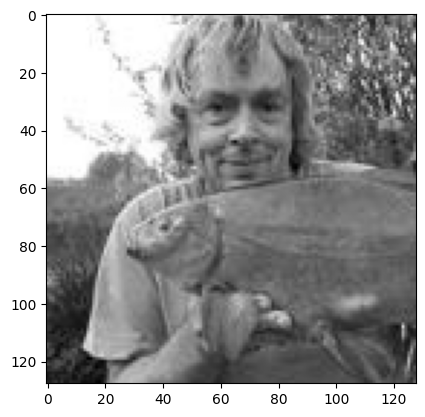

In [9]:
import matplotlib.pyplot as plt
import numpy as np

"""
Deep learning libraries like PyTorch and TensorFlow typically use channels-first format (C, H, W) for image tensors, while matplotlib expects channels-last format (H, W, C). The transpose operation rearranges the dimensions to make the tensor compatible with matplotlib's expectations.
"""

plt.imshow(np.transpose(first_image, (1, 2, 0)), cmap="gray")

In [10]:
# from collections import Counter
#
# counter_w = Counter()
# counter_h = Counter()
#
# for i, data in enumerate(training_data):
#     counter_h.update([data[0].shape[1]])
#     counter_w.update([data[0].shape[2]])
#
# print(sorted(counter_w.items(), key=lambda x: x[1], reverse=True))
# print(sorted(counter_h.items(), key=lambda x: x[1], reverse=True))

In [11]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(128*128, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



In [12]:
model = NeuralNetwork()
print(model)
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16384, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
batch_size = 64

# Create data loaders.
train_dl = DataLoader(training_data, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(test_data, batch_size=batch_size)

In [14]:
for b in train_dl:
    print(b[0].shape, b[1])
    break

torch.Size([64, 1, 128, 128]) tensor([8, 7, 8, 6, 3, 7, 1, 7, 4, 0, 7, 6, 5, 6, 7, 4, 9, 8, 8, 1, 9, 9, 3, 0,
        2, 7, 5, 7, 9, 1, 1, 5, 1, 1, 7, 5, 6, 6, 1, 6, 3, 4, 7, 9, 2, 9, 9, 4,
        4, 7, 9, 4, 8, 6, 7, 4, 9, 4, 9, 9, 3, 8, 8, 9])


In [15]:
from training_utils import train, plot_hist, evaluate

In [16]:
torch.manual_seed(17)
num_epochs = 10
hist = train(model, num_epochs, train_dl, val_dl)

Epoch 1: train_acc: 0.1743 val_acc: 0.1949 train_loss: 2.3275 val_loss: 2.1816
Epoch 2: train_acc: 0.1948 val_acc: 0.1992 train_loss: 2.1925 val_loss: 2.2016
Epoch 3: train_acc: 0.2046 val_acc: 0.2138 train_loss: 2.1740 val_loss: 2.1522
Epoch 4: train_acc: 0.2147 val_acc: 0.2127 train_loss: 2.1515 val_loss: 2.1417
Epoch 5: train_acc: 0.2148 val_acc: 0.2092 train_loss: 2.1477 val_loss: 2.1555
Epoch 6: train_acc: 0.2241 val_acc: 0.2135 train_loss: 2.1331 val_loss: 2.1536
Epoch 7: train_acc: 0.2346 val_acc: 0.2043 train_loss: 2.1188 val_loss: 2.1588
Epoch 8: train_acc: 0.2309 val_acc: 0.2397 train_loss: 2.1191 val_loss: 2.1283
Epoch 9: train_acc: 0.2413 val_acc: 0.2285 train_loss: 2.1117 val_loss: 2.1404
Epoch 10: train_acc: 0.2454 val_acc: 0.2204 train_loss: 2.1037 val_loss: 2.1405


It is challenging to train a model for bigger images with a vanilla neural network.!!!